In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import torch.nn as nn
from torchmetrics import MeanMetric



In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [4]:
dataset = ImageFolder(root='classes' , transform=transform)



In [5]:
BATCH_SIZE = 512

train_size = int(0.9 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [6]:
class CNN(torch.nn.Module):
 
     def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjust based on the output size after pooling
        self.fc2 = nn.Linear(128, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
     def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

In [7]:
model =CNN().cuda()
pos_weight = torch.tensor([1786 / 707]).cuda()
criterion = torch.nn.BCELoss(weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [8]:
N_EPOCHS = 100

In [9]:
for epoch in range( N_EPOCHS):

    for images, labels in train_loader:
        pred_y = model(images.cuda())
        pred_y = pred_y.reshape(-1)

        loss = criterion(pred_y, labels.cuda().float())
        # Zero gradients, perform a backward pass, 
        # and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('epoch loss {}'.format(loss.item()))
    print("Epoch: " , epoch)


epoch loss 1.7503143548965454
Epoch:  0
epoch loss 1.1587494611740112
Epoch:  1
epoch loss 1.0691311359405518
Epoch:  2
epoch loss 0.8855457901954651
Epoch:  3
epoch loss 0.6769881844520569
Epoch:  4
epoch loss 0.41234856843948364
Epoch:  5
epoch loss 0.7286038398742676
Epoch:  6
epoch loss 0.4150659441947937
Epoch:  7
epoch loss 0.3917970061302185
Epoch:  8
epoch loss 0.35263243317604065
Epoch:  9
epoch loss 0.41155317425727844
Epoch:  10
epoch loss 0.21433047950267792
Epoch:  11
epoch loss 0.19237567484378815
Epoch:  12
epoch loss 0.23163200914859772
Epoch:  13
epoch loss 0.08209468424320221
Epoch:  14
epoch loss 0.4935529828071594
Epoch:  15
epoch loss 0.30408892035484314
Epoch:  16
epoch loss 0.6434943079948425
Epoch:  17
epoch loss 0.2249944806098938
Epoch:  18
epoch loss 0.3917834460735321
Epoch:  19
epoch loss 0.2974286377429962
Epoch:  20
epoch loss 0.24724234640598297
Epoch:  21
epoch loss 0.1440284252166748
Epoch:  22
epoch loss 0.09359747171401978
Epoch:  23
epoch loss 0.230

In [10]:
model.eval()
mean_loss = MeanMetric().cuda()

for images, labels in test_loader:
    with torch.no_grad():
        pred_y = model(images.cuda())
        
    pred_y = pred_y.reshape(-1)
    loss = criterion(pred_y, labels.cuda().float())
    mean_loss.update(loss)

    print(loss.item())
print(pred_y , labels)    
print("loss mean: " , mean_loss.compute().item())



0.12770269811153412
tensor([9.1999e-24, 0.0000e+00, 3.1087e-19, 3.8112e-26, 3.1862e-05, 4.6283e-17,
        2.9073e-16, 1.3724e-22, 9.9728e-01, 0.0000e+00, 9.9996e-01, 1.9204e-03,
        1.4483e-06, 1.0000e+00, 0.0000e+00, 9.9994e-01, 9.2541e-01, 4.4340e-26,
        3.6244e-33, 0.0000e+00, 7.7870e-03, 1.2658e-11, 0.0000e+00, 1.0000e+00,
        1.0319e-12, 2.2960e-05, 9.9767e-01, 1.3919e-21, 9.9553e-01, 2.3768e-17,
        0.0000e+00, 0.0000e+00, 9.9995e-01, 2.2701e-03, 5.6615e-12, 1.7933e-28,
        0.0000e+00, 1.8872e-37, 5.6033e-25, 7.6204e-19, 0.0000e+00, 1.1661e-05,
        0.0000e+00, 3.7201e-12, 1.3733e-22, 1.0000e+00, 1.0000e+00, 7.7129e-01,
        3.9019e-14, 0.0000e+00, 2.8086e-15, 8.6881e-05, 0.0000e+00, 9.9723e-01,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 8.4120e-30, 4.7619e-33, 1.5890e-38,
        4.4234e-12, 7.1941e-02, 0.0000e+00, 9.9984e-01, 3.7289e-08, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 9.9997e-01, 3.6432e-01, 9.9985e-01, 6.8199e-08,
        0.0000e+00, 

In [11]:
import torch

# Initialize lists to store the entire dataset
all_data = []
all_labels = []

# Iterate over the DataLoader and concatenate the batches
for data, labels in test_loader:
    all_data.append(data)
    all_labels.append(labels)

# Concatenate all batches into a single tensor
all_data = torch.cat(all_data, dim=0)
all_labels = torch.cat(all_labels, dim=0)

# Move data to the appropriate device (e.g., GPU if available)
all_data, all_labels = all_data.to(device), all_labels.to(device)

# Make predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    preds = model(all_data)

print(preds)

tensor([[9.1999e-24],
        [0.0000e+00],
        [3.1087e-19],
        [3.8112e-26],
        [3.1862e-05],
        [4.6283e-17],
        [2.9073e-16],
        [1.3724e-22],
        [9.9728e-01],
        [0.0000e+00],
        [9.9996e-01],
        [1.9204e-03],
        [1.4483e-06],
        [1.0000e+00],
        [0.0000e+00],
        [9.9994e-01],
        [9.2541e-01],
        [4.4340e-26],
        [3.6244e-33],
        [0.0000e+00],
        [7.7870e-03],
        [1.2658e-11],
        [0.0000e+00],
        [1.0000e+00],
        [1.0319e-12],
        [2.2960e-05],
        [9.9767e-01],
        [1.3919e-21],
        [9.9553e-01],
        [2.3768e-17],
        [0.0000e+00],
        [0.0000e+00],
        [9.9995e-01],
        [2.2701e-03],
        [5.6615e-12],
        [1.7933e-28],
        [0.0000e+00],
        [1.8872e-37],
        [5.6033e-25],
        [7.6204e-19],
        [0.0000e+00],
        [1.1661e-05],
        [0.0000e+00],
        [3.7201e-12],
        [1.3733e-22],
        [1

In [12]:
len(preds)

250

In [13]:
preds = preds.transpose(0,1)

preds = (preds >= 0.5).float()
preds = preds.reshape(preds.shape[1],)

preds

tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
        1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
        0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 

In [14]:
all_labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0], device='cuda:0')

In [15]:
result = torch.tensor(preds == all_labels , dtype=torch.float)
result

C:\Users\Jamil\AppData\Local\Temp\ipykernel_2604\1503199555.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(preds == all_labels , dtype=torch.float)


tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [16]:
ones_freq = result[result == 1.0]
ones_freq = len(ones_freq)
ones_freq

246

In [17]:
accuracy = ones_freq / len(result) * 100
print(f"Accuracy : {accuracy:.2f}%")


Accuracy : 98.40%


In [18]:
all_labels.shape

torch.Size([250])

In [19]:
preds.shape

torch.Size([250])

In [20]:
from sklearn.metrics import confusion_matrix


In [21]:
all_labels = all_labels.cpu().numpy()
preds = preds.cpu().numpy()

# Calculate confusion matrix
cm = confusion_matrix(all_labels, preds)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[173   4]
 [  0  73]]


In [22]:
neg_accuracy = int(( ( ((cm[0][1] /( cm[0][0] + cm[0][1]) )  ) ) - 1 ) * 100 * -1 )
neg_accuracy

97

In [23]:
pos_accuracy = int(( ( ((cm[1][0] /( cm[1][0] + cm[1][1]) )  ) ) - 1 ) * 100 * -1 )
pos_accuracy

100

In [24]:
cm[0][0]

np.int64(173)

In [25]:
# torch.save(model ,"cnn")
# torch.save

In [26]:
import os
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt


In [27]:
image_dir = 'Real world test samples'
model.eval()

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [28]:
def display_image_with_prediction(image_path):
    image = Image.open(image_path)
    input_tensor = transform(image).unsqueeze(0).cuda()  # Add batch dimension

    with torch.no_grad():
        output = model(input_tensor)
    
    plt.imshow(image)
    if output.item() >=0.5 :
        character_ = "Uchiha Naori"
    else :
        character_ = "Naruto"
    plt.title(f'Prediction: {character_}')
    plt.axis('off')
    plt.show()

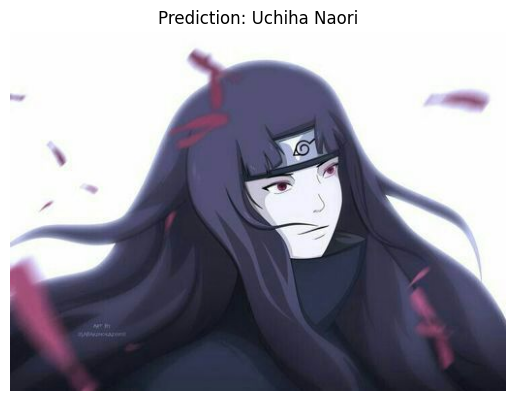

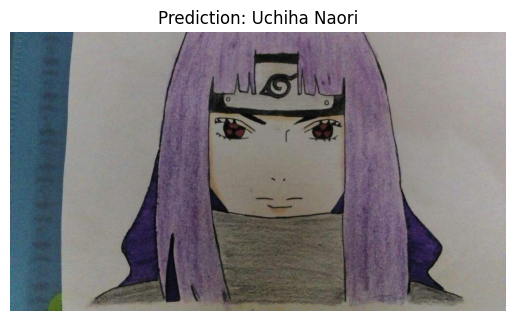

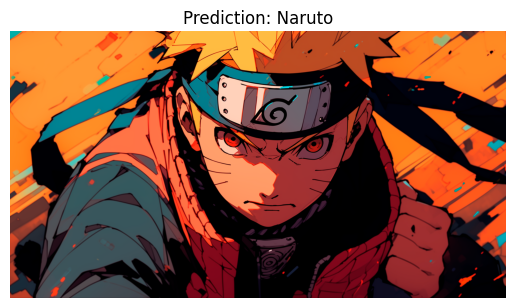

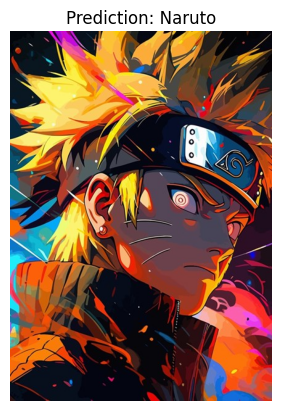

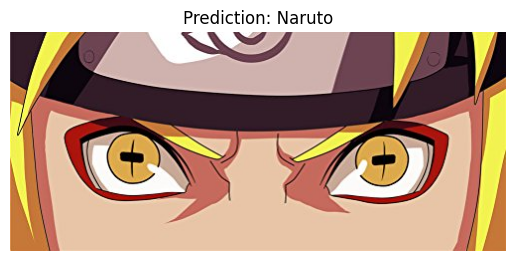

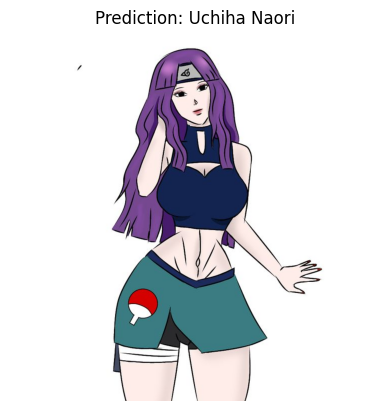

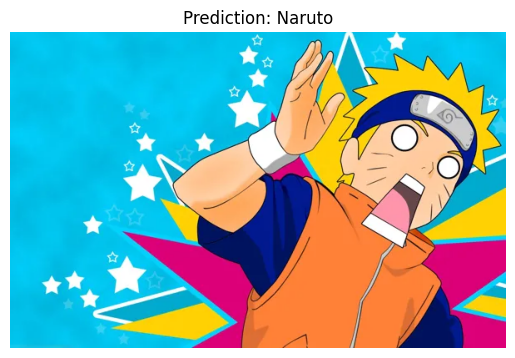

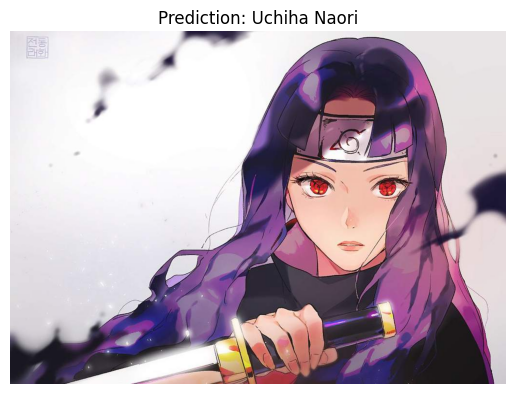

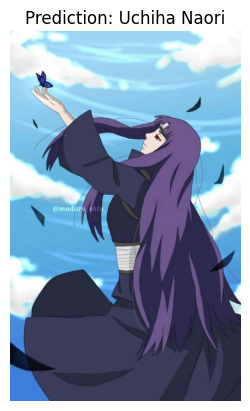

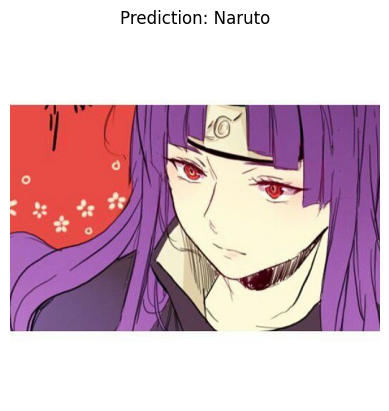

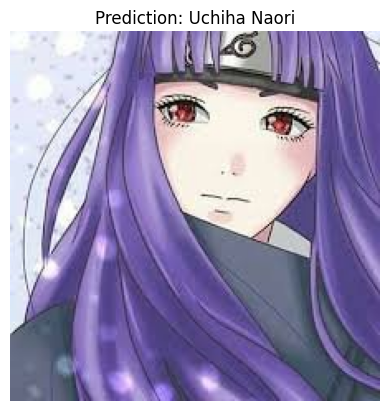

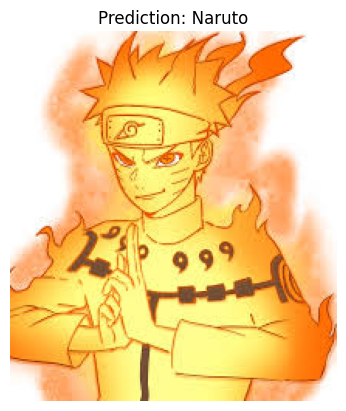

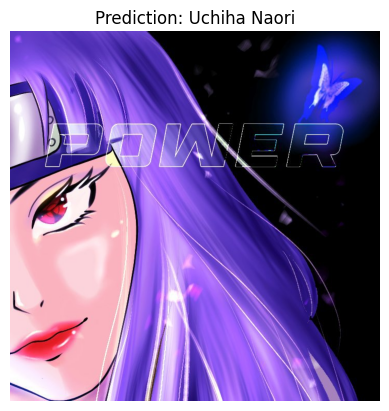

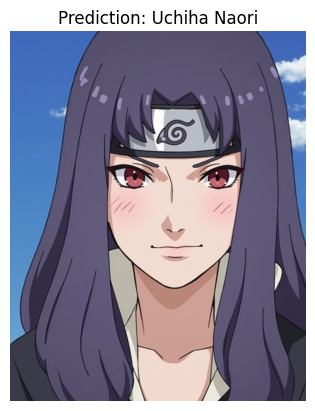

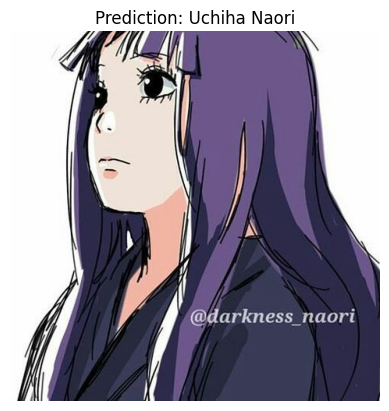

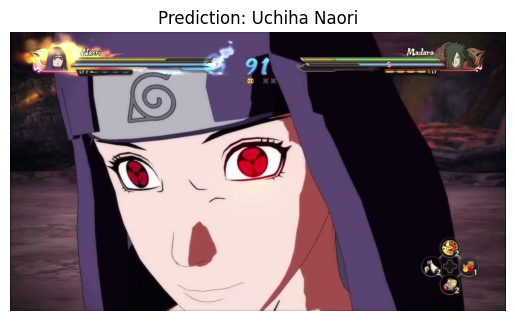

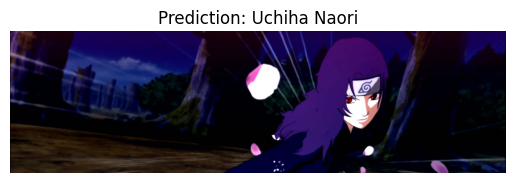

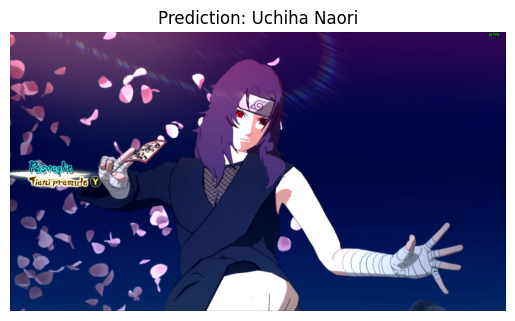

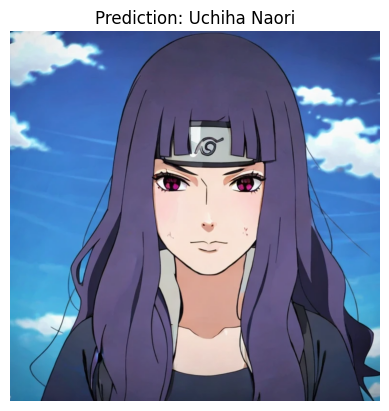

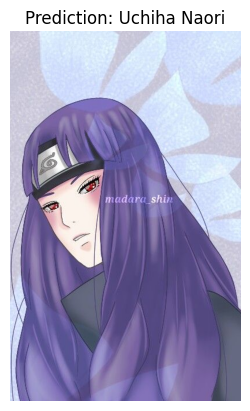

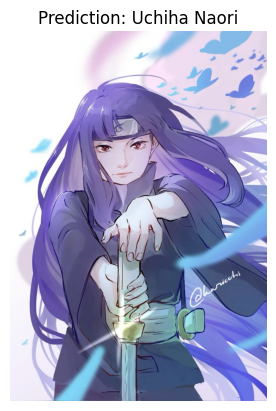

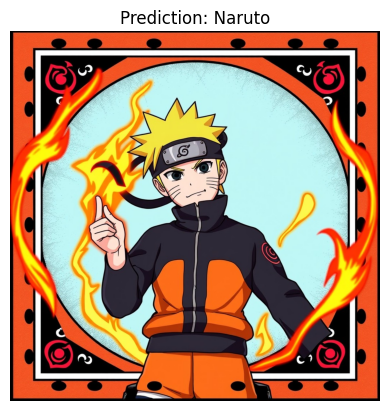

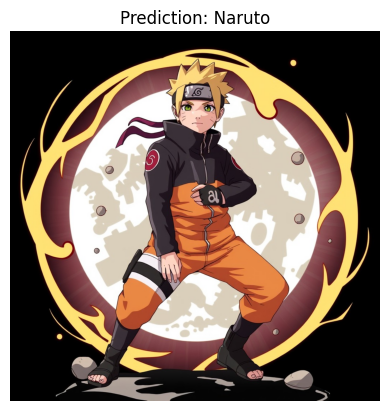

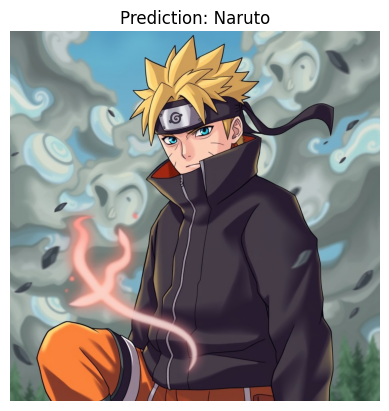

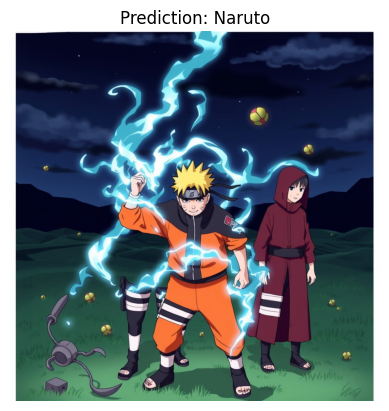

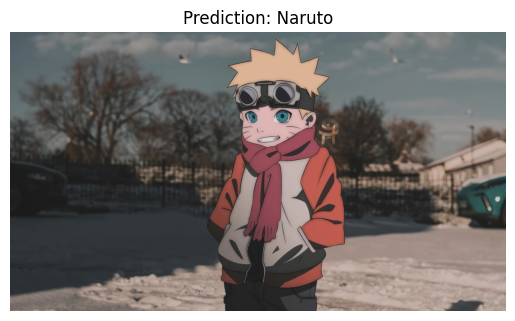

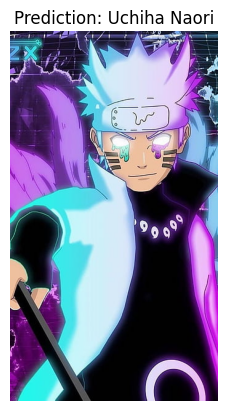

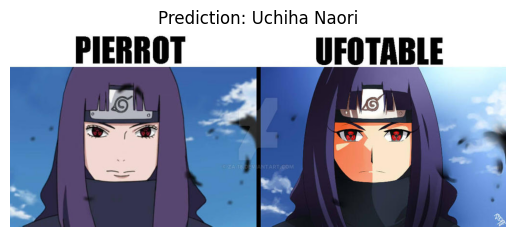

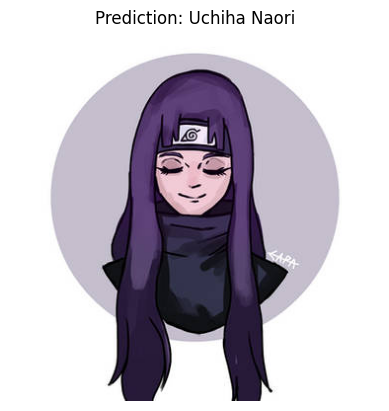

In [29]:
image_files = [f for f in os.listdir(image_dir) if f.endswith(('png', 'jpg', 'jpeg'))]

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    display_image_with_prediction(image_path)
    #input("Press Enter to continue...")